# Context

The data being used for this analysis includes attributes of borrowers such as fico score, interest rate, purpose of loan and if the loan was paid off in full.

# Content

The data is available from LendingClub. 2007-2010 data has been cleared of all NA values. It is also available in Machine Learning course by Jose Portilla. 

# Inspiration

Could I have set better gamma and cost values?

https://www.kaggle.com/datasets/sarahvch/predicting-who-pays-back-loans?datasetId=906&sortBy=relevance&select=loan_data.csv

In [1]:
import numpy as mp
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import classification_report,confusion_matrix

from sklearn.metrics import classification_report,confusion_matrix


In [2]:
data=pd.read_csv(r"C:\Users\erfan\Desktop\data science\ML2\projects\loan bank project\loan\loan_data.csv")

In [3]:
data.head(10)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
5,1,credit_card,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,0
6,1,debt_consolidation,0.1496,194.02,10.714418,4.00,667,3180.041667,3839,76.8,0,0,1,1
7,1,all_other,0.1114,131.22,11.002100,11.08,722,5116.000000,24220,68.6,0,0,0,1
8,1,home_improvement,0.1134,87.19,11.407565,17.25,682,3989.000000,69909,51.1,1,0,0,0
9,1,debt_consolidation,0.1221,84.12,10.203592,10.00,707,2730.041667,5630,23.0,1,0,0,0


In [4]:
data=pd.get_dummies(data)

In [5]:
data.tail(10)

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
9568,0,0.1979,37.06,10.645425,22.17,667,5916.000000,28854,59.8,6,0,1,0,1,0,0,0,0,0,0
9569,0,0.1426,823.34,12.429216,3.62,722,3239.958333,33575,83.9,5,0,0,1,0,0,0,0,1,0,0
9570,0,0.1671,113.63,10.645425,28.06,672,3210.041667,25759,63.8,5,0,0,1,1,0,0,0,0,0,0
9571,0,0.1568,161.01,11.225243,8.00,677,7230.000000,6909,29.2,4,0,1,1,1,0,0,0,0,0,0
9572,0,0.1565,69.98,10.110472,7.02,662,8190.041667,2999,39.5,6,0,0,1,0,0,1,0,0,0,0
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,1,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,1,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,0,0,1,0,0,0,0
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,0,0,0,0,1,0,0
9577,0,0.1392,853.43,11.264464,16.28,732,4740.000000,37879,57.0,6,0,0,1,0,0,1,0,0,0,0


In [6]:
data.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054,0.243370,0.131760,0.413134,0.035811,0.065671,0.045625,0.064627
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676,0.429139,0.338248,0.492422,0.185829,0.247720,0.208682,0.245880
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


showing distribution of dataset

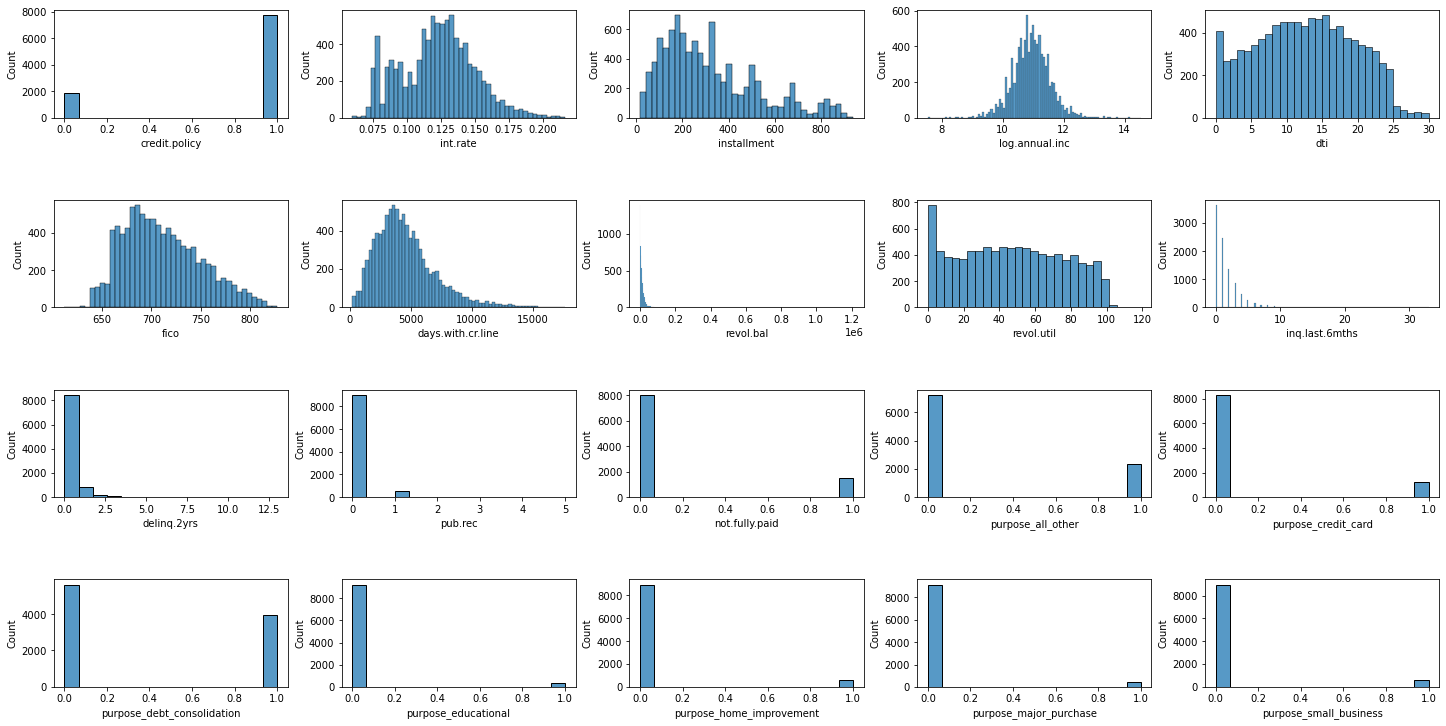

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

fig, axs = plt.subplots(ncols=5, nrows=4, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in data.items():
    sns.histplot(x=k, data=data, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

corrolation of datasets

<AxesSubplot:>

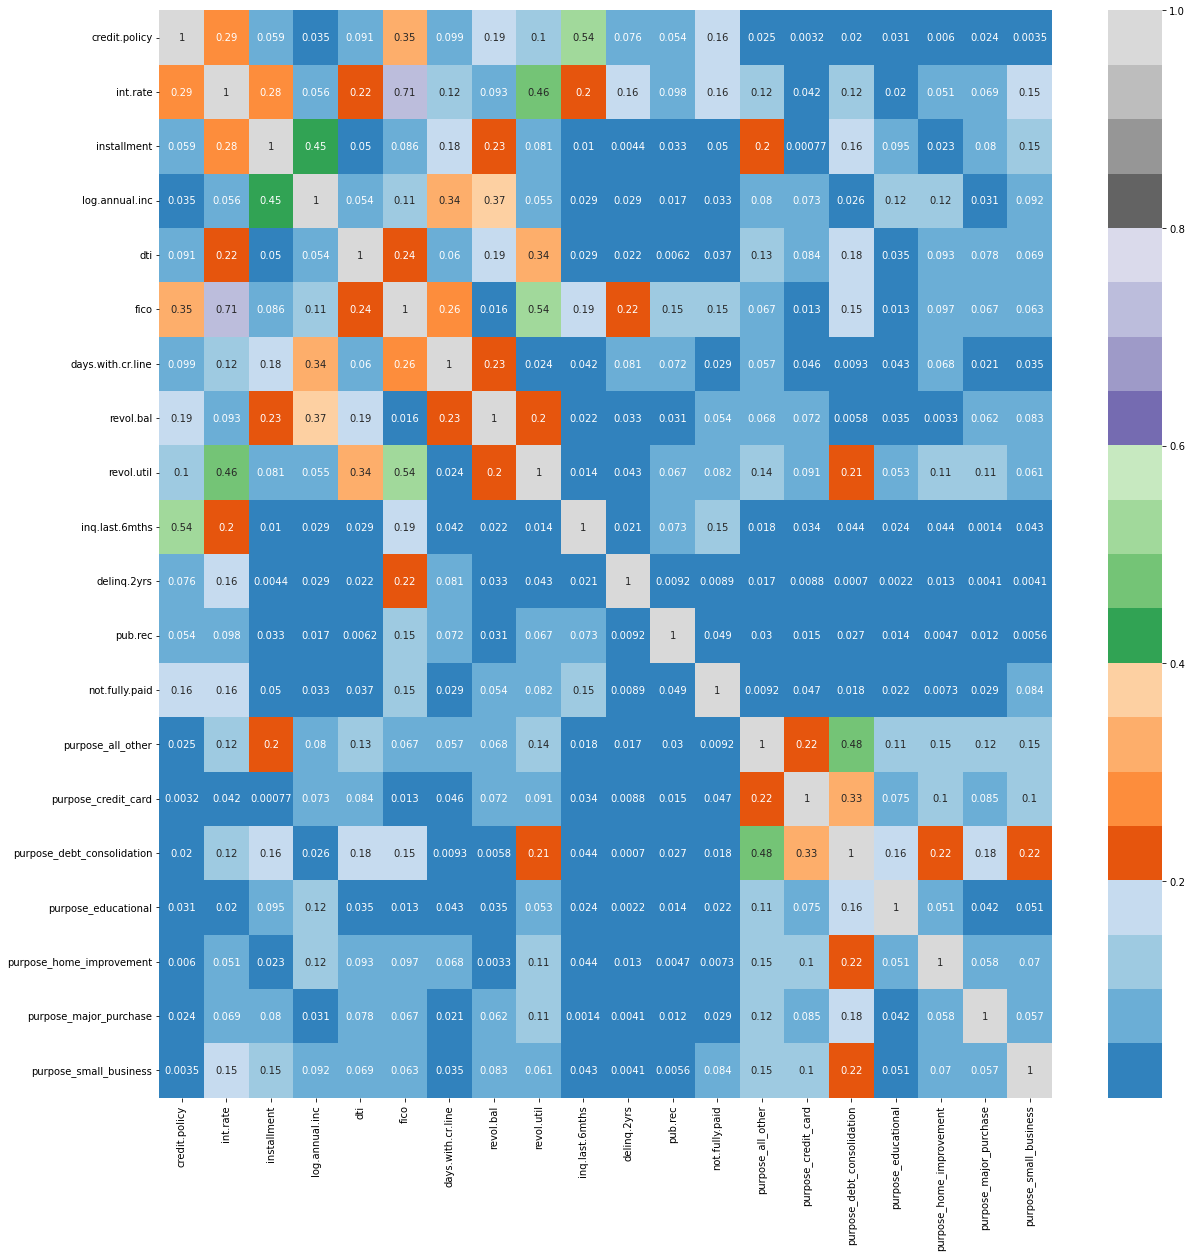

In [8]:
plt.figure(figsize=(20, 20))
sns.heatmap(data.corr().abs(),  annot=True,cmap=plt.cm.get_cmap('tab20c'))

In [9]:
target=data['not.fully.paid']

data=data.drop('not.fully.paid',axis=1)

## PCA

use pca for dimensionality reduction

In [10]:
from sklearn.decomposition import PCA


In [11]:
pca = PCA(n_components=0.95,random_state=42)

In [12]:
pca=pca.fit(data)

In [13]:
print(pca.explained_variance_ratio_)

[0.99480882]


In [14]:
print(np.round(pca.explained_variance_ratio_ * 100, 2))

[99.48]


In [15]:
print(pca.singular_values_)

[3303934.46519554]


In [16]:
total_var = np.cumsum(pca.explained_variance_ratio_) * 100

for i in range(1):
    print("PC {:2d}, explained var: {:.2f}".format(i+1, total_var[i]))

PC  1, explained var: 99.48


## TSNE

In [17]:
from sklearn.manifold import TSNE #dimensionality reduction with tsne 

In [18]:

tsne = TSNE(n_components=2,random_state=42)

tsne_data = tsne.fit_transform(data);

tsne_data = np.vstack((tsne_data.T, target)).T


C:\Users\erfan\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\erfan\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


C:\Users\erfan\AppData\Local\Temp\ipykernel_15656\3247681183.py:8: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


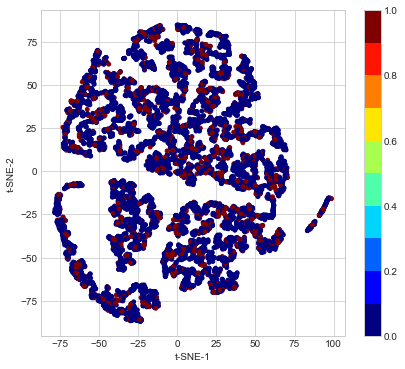

In [19]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (15,6))
c_map = plt.cm.get_cmap('jet', 10)


plt.subplot(1, 2, 2)
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], s = 15, cmap = c_map , c = target)
plt.colorbar()
plt.xlabel('t-SNE-1') , plt.ylabel('t-SNE-2')


plt.show()

## KNN

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [31]:


y_pred = classifier.predict(X_test)


C:\Users\erfan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[[1937   75]
 [ 354   29]]
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      2012
           1       0.28      0.08      0.12       383

    accuracy                           0.82      2395
   macro avg       0.56      0.52      0.51      2395
weighted avg       0.75      0.82      0.78      2395



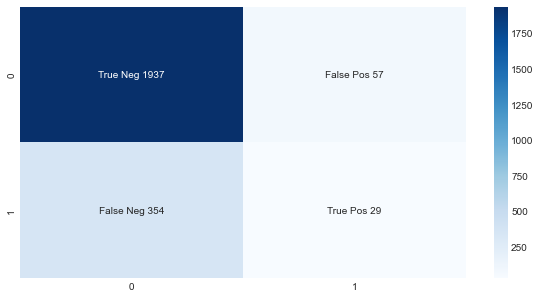

In [32]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))
plt.figure(figsize=(10,5))
labels = ['True Neg 1937','False Pos 57','False Neg 354','True Pos 29']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
plt.show()

## NB

In [33]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [34]:
gapred=classifier.predict(X_test)


In [35]:
print(classification_report(y_test,gapred))
print(confusion_matrix(y_test,gapred))

              precision    recall  f1-score   support

           0       0.87      0.84      0.86      2012
           1       0.30      0.36      0.33       383

    accuracy                           0.77      2395
   macro avg       0.59      0.60      0.59      2395
weighted avg       0.78      0.77      0.77      2395

[[1696  316]
 [ 246  137]]


[[1696  316]
 [ 246  137]]
              precision    recall  f1-score   support

           0       0.87      0.84      0.86      2012
           1       0.30      0.36      0.33       383

    accuracy                           0.77      2395
   macro avg       0.59      0.60      0.59      2395
weighted avg       0.78      0.77      0.77      2395



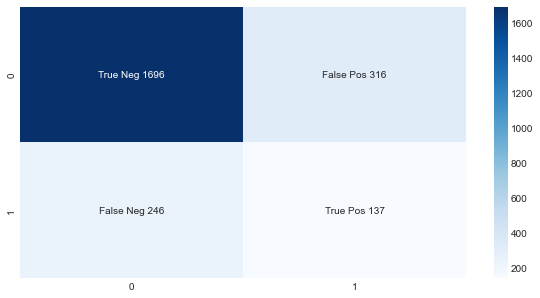

In [36]:
cm = confusion_matrix(y_test, gapred)
print(cm)
print(classification_report(y_test, gapred))
plt.figure(figsize=(10,5))
labels = ['True Neg 1696','False Pos 316','False Neg 246','True Pos 137']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
plt.show()

## SVM

In [37]:
svc=SVC(C=0.5,kernel='rbf',verbose=True,random_state=42)
svc.fit(X_train,y_train)

[LibSVM]

SVC(C=0.5, random_state=42, verbose=True)

In [38]:
svc.score(X_train,y_train)

0.8403174161213978

In [39]:
svc.score(X_test,y_test)

0.8396659707724425

In [40]:
svcpred=svc.predict(X_test)


In [41]:
print(classification_report(y_test,svcpred))
print(confusion_matrix(y_test,svcpred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2012
           1       0.00      0.00      0.00       383

    accuracy                           0.84      2395
   macro avg       0.42      0.50      0.46      2395
weighted avg       0.71      0.84      0.77      2395

[[2011    1]
 [ 383    0]]


[[2011    1]
 [ 383    0]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2012
           1       0.00      0.00      0.00       383

    accuracy                           0.84      2395
   macro avg       0.42      0.50      0.46      2395
weighted avg       0.71      0.84      0.77      2395



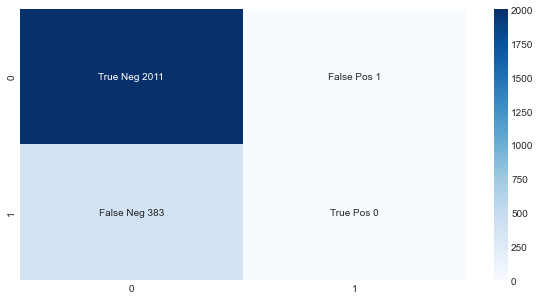

In [42]:
cm = confusion_matrix(y_test, svcpred)
print(cm)
print(classification_report(y_test, svcpred))
plt.figure(figsize=(10,5))
labels = ['True Neg 2011','False Pos 1','False Neg 383','True Pos 0']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
plt.show()